## Binarization Algorithm

#### This is an image binarization algorithm that uses the Otsu's method to find the optimal threshold value for the binarization of the image.
---

In [88]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [89]:
# Loss function
def get_loss(num, bin, thresh, tuning_method, tuning, under_tuning, over_tuning):
     bin = bin[:-1]
     
     # distance if the pixel is under the threshold
     dist_under_thresh = bin[:thresh]
     # distance if the pixel is over the threshold
     dist_over_thresh = 255 - bin[thresh:]
     
     # Tune according to 'skewness' and value inserted by the user
     if tuning_method ==  'Auto':
         
         weighted = bin*num
         m = np.sum(weighted)/np.sum(num)

         if m > (255/2 + 20):
             tuned_dist_under_thresh = dist_under_thresh
             tuned_dist_over_thresh = dist_over_thresh + tuning
         elif m < (255/2 - 20):
             tuned_dist_under_thresh = dist_under_thresh + tuning
             tuned_dist_over_thresh = dist_over_thresh
         else:
             tuned_dist_under_thresh = dist_under_thresh
             tuned_dist_over_thresh = dist_over_thresh
          
     elif under_tuning and over_tuning:
         
         tuned_dist_under_thresh = dist_under_thresh + under_tuning
         tuned_dist_over_thresh = dist_over_thresh + over_tuning
         
     else:
         print('Insert tuning values')
         return
         
     # concatenate the two parts
     dist_mat = np.concatenate((tuned_dist_under_thresh, tuned_dist_over_thresh))
     loss = np.sum(num * dist_mat) # Loss function
     return loss

def get_best_thresh(num, bin, tuning_method = 'Auto', tuning = 0, under_tuning = 0, over_tuning = 0, show_loss = False):
	loss_list = []
	for i in range(1,255):
		loss = get_loss(num, bin, i, tuning_method, tuning, under_tuning, over_tuning)
		loss_list.append(loss)
	min_loss = np.min(loss_list)
	best_thresh = np.argmin(loss_list)
	if show_loss:
		plt.figure()
		plt.plot(loss_list)
		plt.title('Loss function')
	return best_thresh, min_loss

def apply_thresh(img_gray, thresh, show_img = False):
	img_bin = img_gray > thresh # Mask
	if show_img:
		plt.figure()
		plt.imshow(img_bin, cmap='gray')
		plt.title('Binarized'), plt.xticks([]), plt.yticks([])
	return img_bin

The best threshold is:  112
The minimum loss is:  94875095.0


(Text(0.5, 1.0, 'Binarized with Otsu'), ([], []), ([], []))

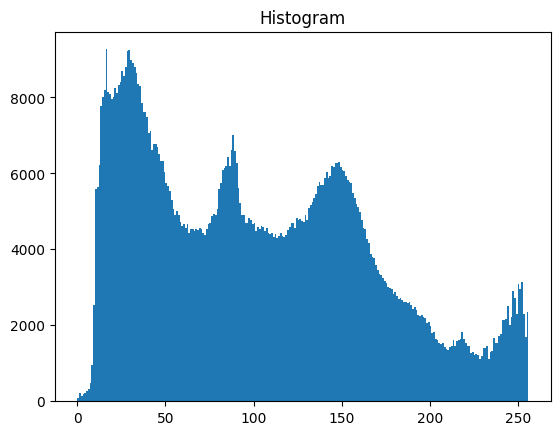

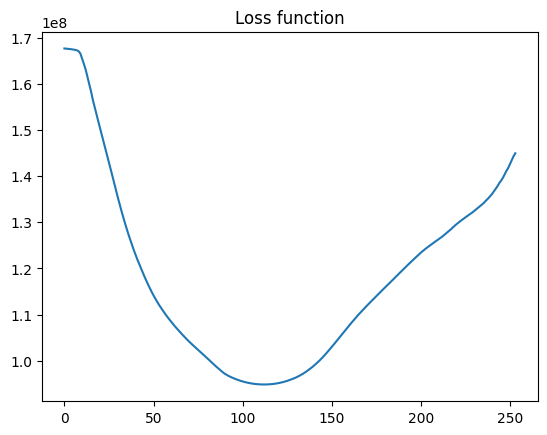

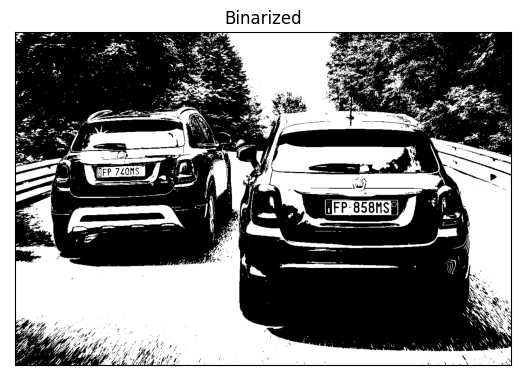

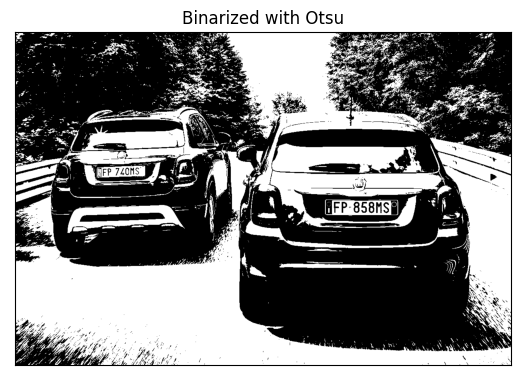

In [90]:
# Load image
img = cv.imread('images/carplates.jpeg')

# Convert to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Show the histogram
num, bin, _ = plt.hist(img_gray.ravel(), 256, [0, 256])
plt.title('Histogram')

# Get the best threshold
best_thresh, min_loss = get_best_thresh(num, bin, tuning_method = 'Auto', tuning = 30, show_loss=True)
img_bin = apply_thresh(img_gray, best_thresh, show_img = True)

print('The best threshold is: ', best_thresh)
print('The minimum loss is: ', min_loss)

img_otsu = cv.threshold(img_gray, 0, 255, cv.THRESH_OTSU)[1]
plt.figure()
plt.imshow(img_otsu, cmap='gray')
plt.title('Binarized with Otsu'), plt.xticks([]), plt.yticks([])